<a href="https://colab.research.google.com/github/enino84/Data-Assimilation-2022/blob/main/DA_the_Lorenz_63_and_the_Lorenz_96_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding error propagation**

## Lorenz 63 Model

\begin{eqnarray}
\frac{dx}{dt}&=&a(y-x) \\
\frac{dy}{dt}&=&x(b-z)-y \\
\frac{dy}{dt}&=&x(b-z)-y 
\end{eqnarray}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

In [ ]:
#x[0] = x
#x[1] = y
#x[2] = z
def lorenz63(x,t,args=(10, 28, 8/3)):
  a = args[0];
  b = args[1];
  c = args[2];
  return [a*(x[1]-x[0]),
          x[0]*(b-x[2])-x[1],
          x[0]*x[1]-c*x[2]];

## 1. Create the initial condition

\begin{eqnarray}
{\bf x}_0 \sim \mathcal{N} \left( {\bf 0},\, {\bf I} \right)
\end{eqnarray}

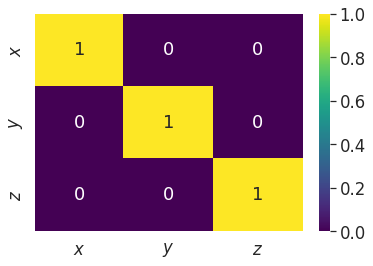

In [ ]:
sns.set(font_scale=1.5)
sns.heatmap(np.eye(3), annot=True, cmap='viridis', xticklabels=['$x$','$y$','$z$'],
            yticklabels=['$x$','$y$','$z$']);


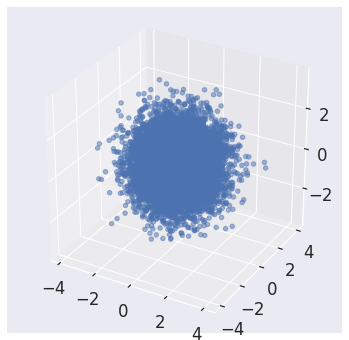

In [ ]:
x0 = np.random.randn(10000,3);
fig = plt.figure(figsize=(6,6));
ax = plt.axes(projection='3d');
ax.scatter3D(x0[:,0],x0[:,1],x0[:,2],alpha=.5);

In [ ]:
t = np.linspace(0,10,500)
x0 = np.random.randn(10000,3);
ic_pool = [];
for ic in x0:
  xs = odeint(lorenz63, ic, t);
  ic_pool.append(xs[-1,:]);

In [ ]:
len(ic_pool[0])

3

In [ ]:
x0b = np.array(ic_pool, dtype=np.float32)

In [ ]:
x0b.shape

(10000, 3)

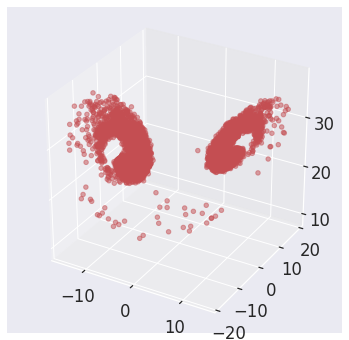

In [ ]:
fig = plt.figure(figsize=(6,6));
ax = plt.axes(projection='3d');
ax.scatter3D(x0b[:,0],x0b[:,1],x0b[:,2],alpha=.5,color='r');

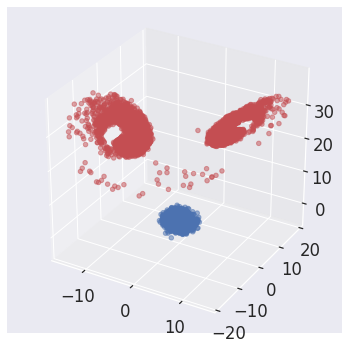

In [ ]:
fig = plt.figure(figsize=(6,6));
ax = plt.axes(projection='3d');
ax.scatter3D(x0[:,0],x0[:,1],x0[:,2],alpha=.5,color='b');
ax.scatter3D(x0b[:,0],x0b[:,1],x0b[:,2],alpha=.5,color='r');

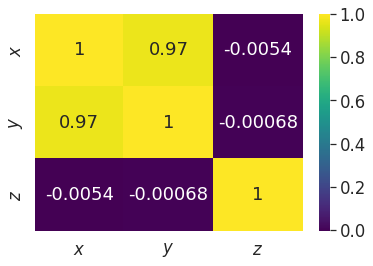

In [ ]:
B = np.corrcoef(x0b.T);

sns.set(font_scale=1.5)
sns.heatmap(B, annot=True, cmap='viridis', xticklabels=['$x$','$y$','$z$'],
            yticklabels=['$x$','$y$','$z$']);

## 2. Correlations from model dynamics

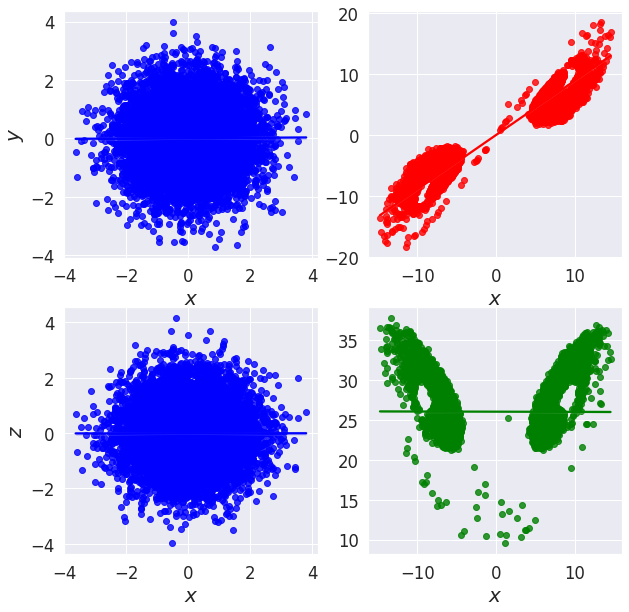

In [ ]:
fig = plt.figure(figsize=(10,10));
plt.subplot(2,2,1);
sns.regplot(x=x0[:,0], y=x0[:,1], color='blue')
plt.xlabel('$x$', fontdict={'size':20});
plt.ylabel('$y$', fontdict={'size':20});

plt.subplot(2,2,2);
sns.regplot(x=x0b[:,0], y=x0b[:,1], color='red')
plt.xlabel('$x$', fontdict={'size':20});
#plt.ylabel('$y$', fontdict={'size':20});

plt.subplot(2,2,3);
sns.regplot(x=x0[:,0], y=x0[:,2], color='blue')
plt.xlabel('$x$', fontdict={'size':20});
plt.ylabel('$z$', fontdict={'size':20});

plt.subplot(2,2,4);
sns.regplot(x=x0b[:,0], y=x0b[:,2], color='green')
plt.xlabel('$x$', fontdict={'size':20});
#plt.ylabel('$y$', fontdict={'size':20});

## Lorenz 96 Model

\begin{eqnarray}
\frac{dx_i}{dt} = (x_{i+1}-x_{i-2})x_{i-1} - x_i + F\,, \text{ for $1 \le i \le n$}
\end{eqnarray}

When $F=8$, the model exhibit chaotic behavior. Usually, $n=40$

In [ ]:
def lorenz96(x, t, args=(8,)):
  n = x.size;
  F = args[0];
  return [(x[(i+1)%n]-x[i-2])*x[i-1]-x[i]+F for i in range(0,n)]; #list comprehension

\begin{eqnarray}
{\bf X} = {\bf U}\boldsymbol{\Sigma}{\bf V}^T \Rightarrow {\bf X}\underbrace{{\bf V}\boldsymbol{\Sigma}^{-1}}_{\text{Projector}} = {\bf U} \Rightarrow {\bf X}\boldsymbol{\Phi} = {\bf U}
\end{eqnarray}

1. Projector for 1D ${\bf X} \boldsymbol{\phi}_1 = {\bf u}_1$
2. Projectors for 2D ${\bf X} \left [\boldsymbol{\phi}_1,\,  \boldsymbol{\phi}_2 \right ] = \left [{\bf u}_1,\, {\bf u}_2 \right ]$
3. Projectors for 3D ${\bf X} \left [\boldsymbol{\phi}_1,\,  \boldsymbol{\phi}_2 ,\,  \boldsymbol{\phi}_3 \right ] = \left [{\bf u}_1,\, {\bf u}_2 ,\, {\bf u}_3\right ]$

## 1. Create the initial condition

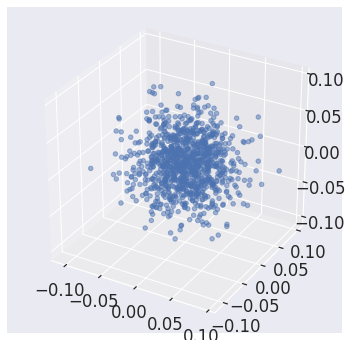

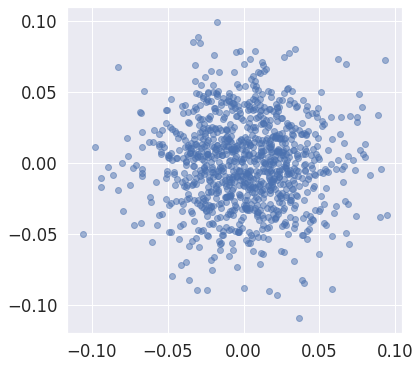

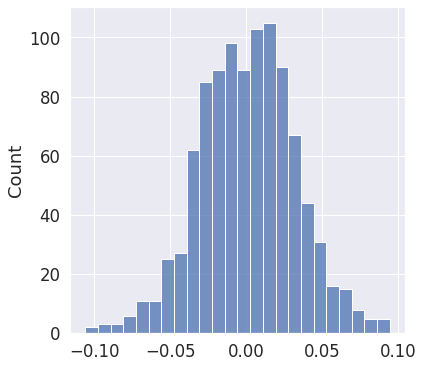

In [ ]:
x0 = np.random.randn(1000,40);

U,S,V = np.linalg.svd(x0, full_matrices=False)

fig = plt.figure(figsize=(6,6));
ax = plt.axes(projection='3d');
ax.scatter3D(U[:,0],U[:,1],U[:,2],alpha=.5);

fig = plt.figure(figsize=(6,6));
plt.plot(U[:,0],U[:,1],'ob', alpha=.5);

fig = plt.figure(figsize=(6,6));
sns.histplot(U[:,0]);

Correlation matrix - covariance matrix

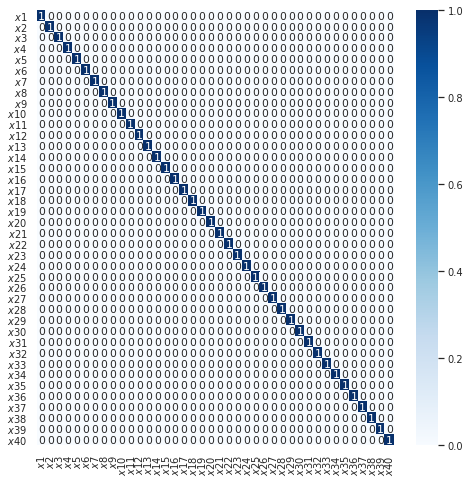

In [ ]:
plt.figure(figsize=(8,8))
sns.set(font_scale=0.9)
sns.heatmap(np.eye(40), annot=True, cmap='Blues', xticklabels=[f'$x{i}$' for i in range(1,41)],
            yticklabels=[f'$x{i}$' for i in range(1,41)]);

In [ ]:
t = np.linspace(0,10,500)
x0 = np.random.randn(1000,40);
ic_pool = [];
for ic in x0:
  xs = odeint(lorenz96, ic, t);
  ic_pool.append(xs[-1,:]);

In [ ]:
x0b = np.array(ic_pool, dtype=np.float32)

In [ ]:
U,S,V = np.linalg.svd(x0b, full_matrices=False);

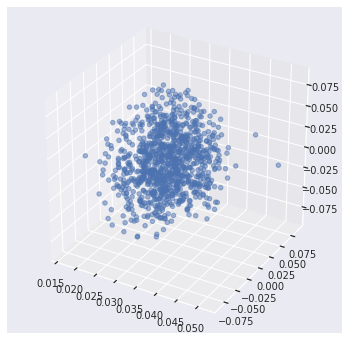

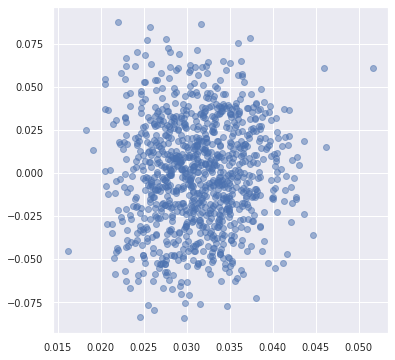

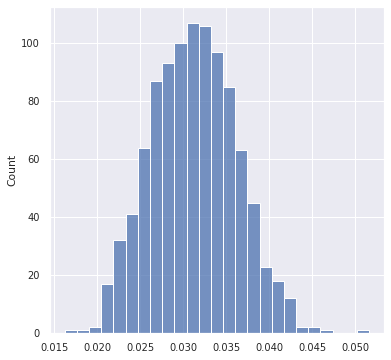

In [ ]:
fig = plt.figure(figsize=(6,6));
ax = plt.axes(projection='3d');
ax.scatter3D(U[:,0],U[:,1],U[:,2],alpha=.5);

fig = plt.figure(figsize=(6,6));
plt.plot(U[:,0],U[:,1],'ob', alpha=.5);

fig = plt.figure(figsize=(6,6));
sns.histplot(U[:,0]);

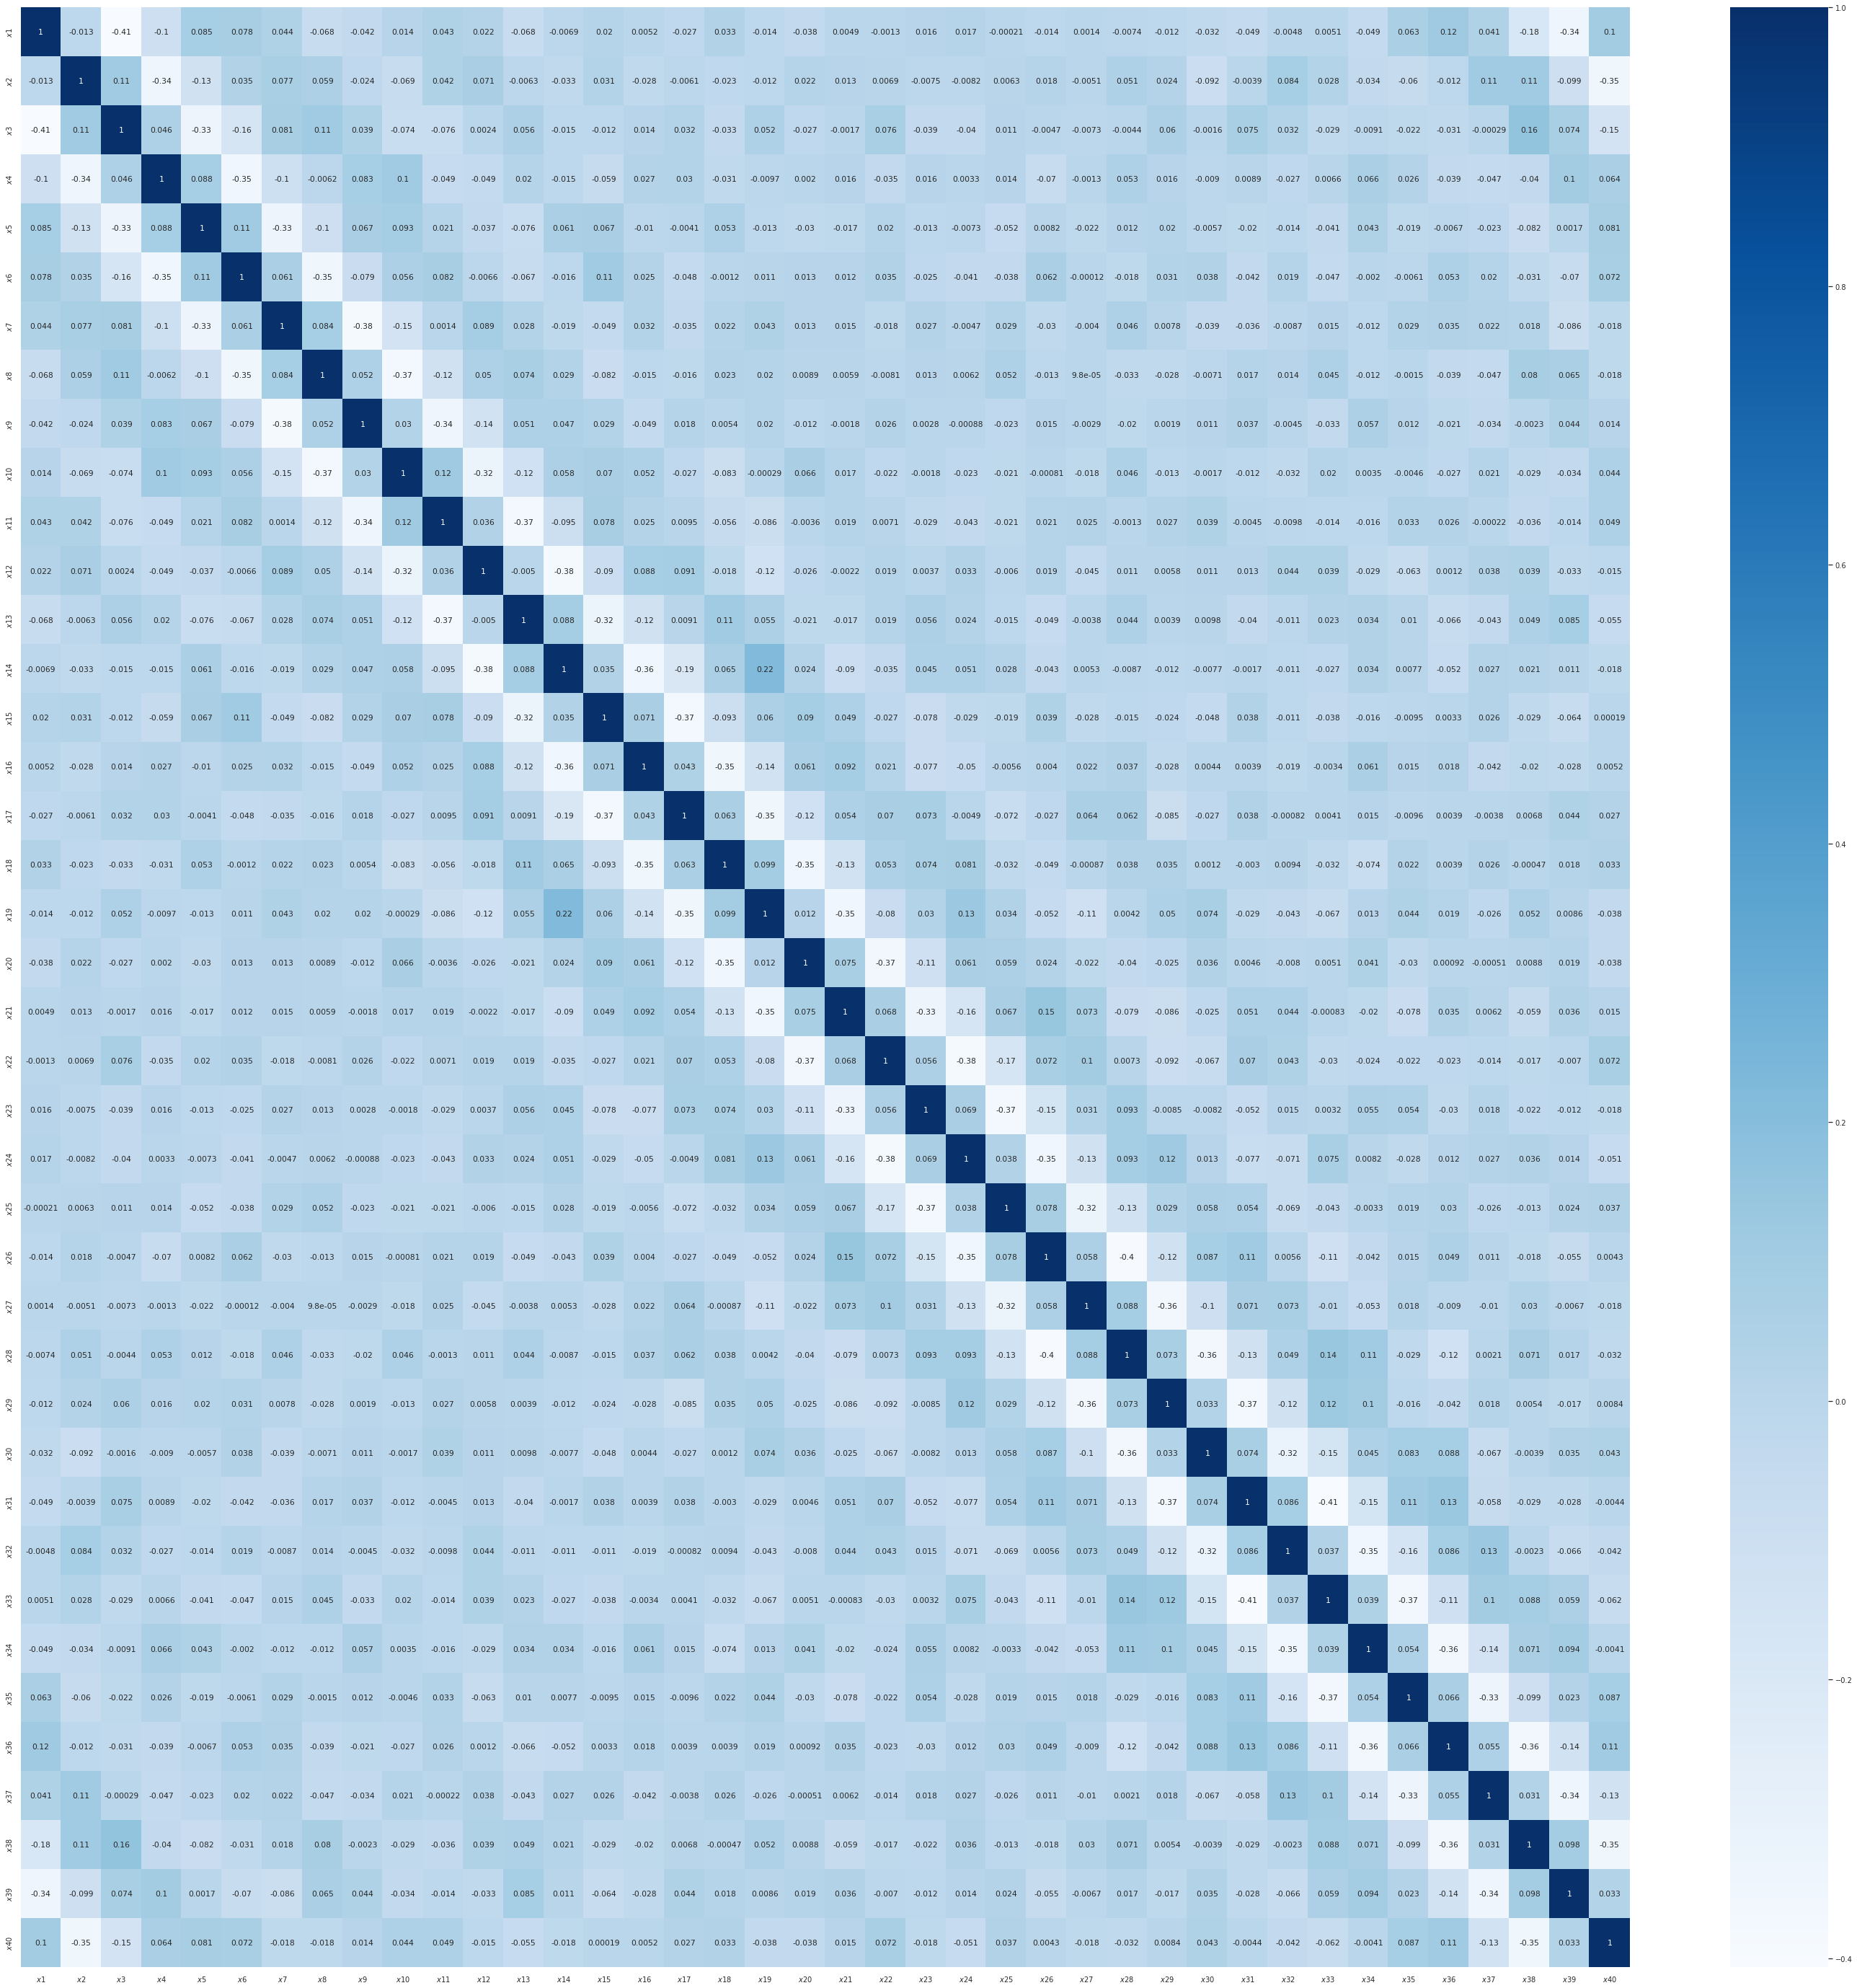

In [ ]:
B = np.corrcoef(x0b.T);
plt.figure(figsize=(50,50))
sns.set(font_scale=0.9)
sns.heatmap(B, annot=True, cmap='Blues', xticklabels=[f'$x{i}$' for i in range(1,41)],
            yticklabels=[f'$x{i}$' for i in range(1,41)]);

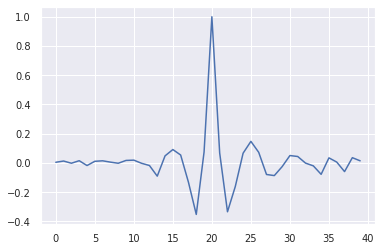

In [ ]:
plt.plot(B[20,:])

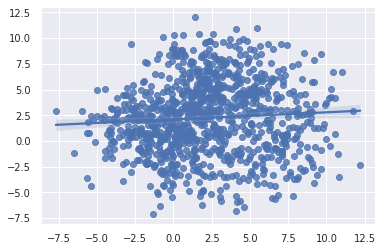

In [ ]:
sns.regplot(x=x0b[:,20],y=x0b[:,21],)

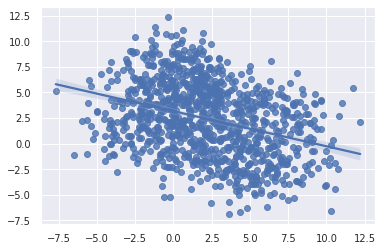

In [ ]:
sns.regplot(x=x0b[:,20],y=x0b[:,22],)